수집된 데이터 기본 정보:
총 데이터 수: 84
그룹 수: 28


/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABL

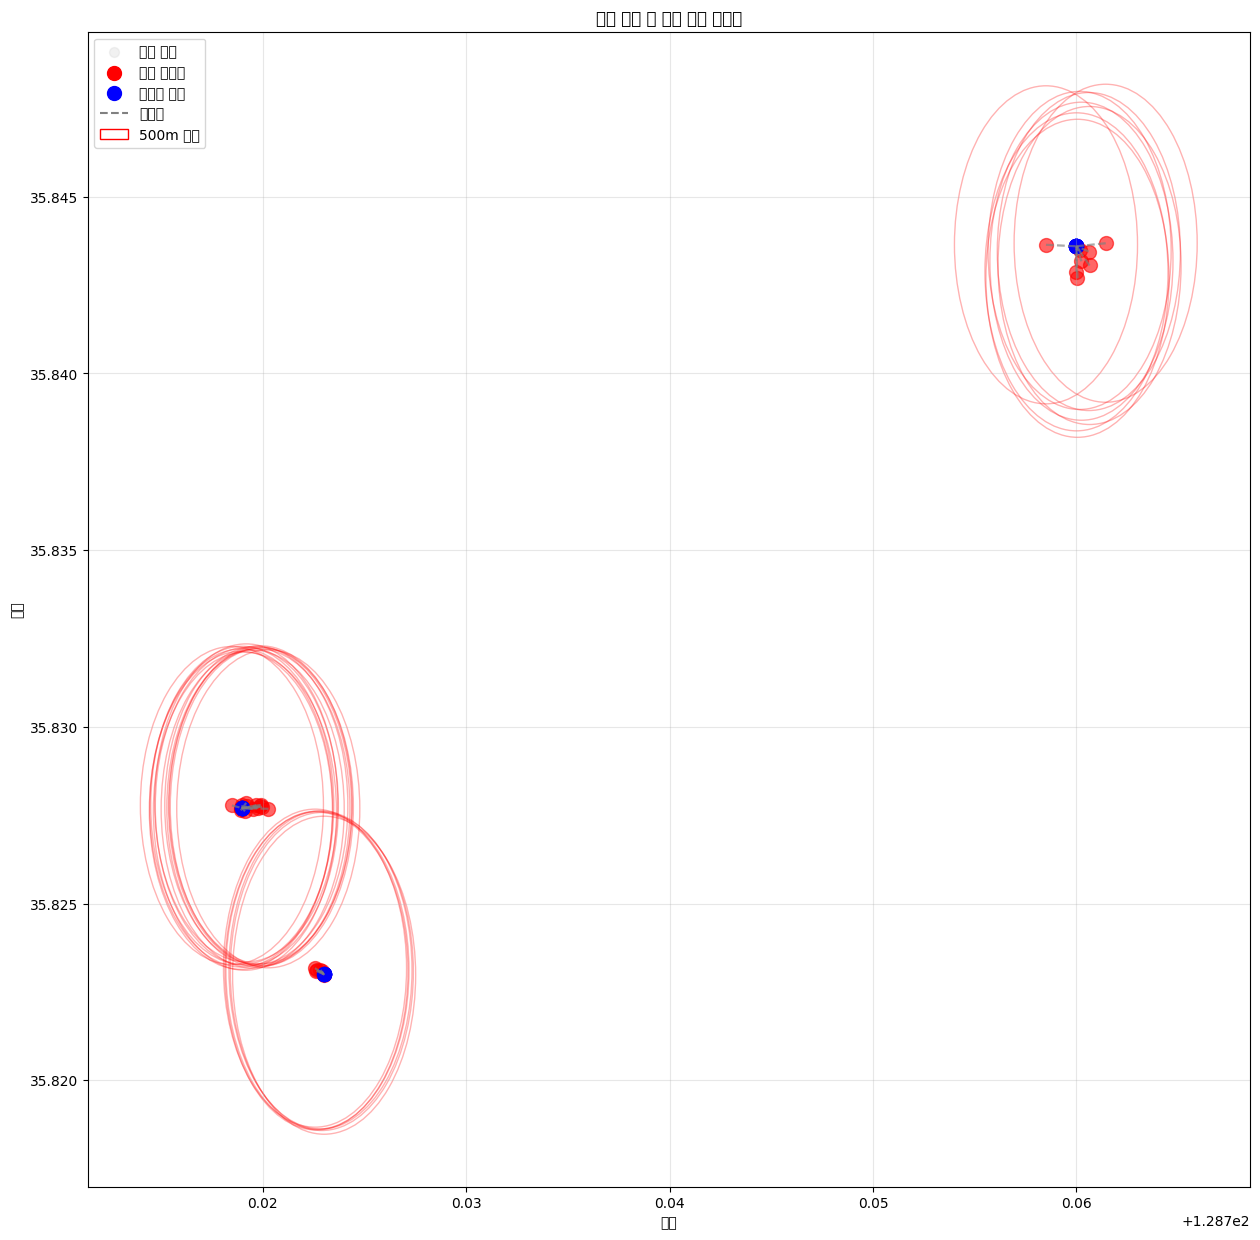

/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE

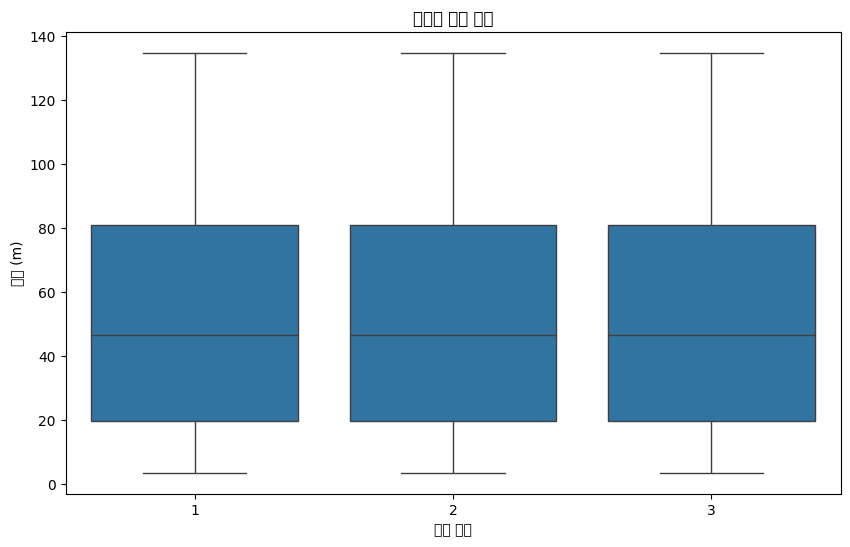

/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/prop-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44620 (\N{HANGUL SYLLAB

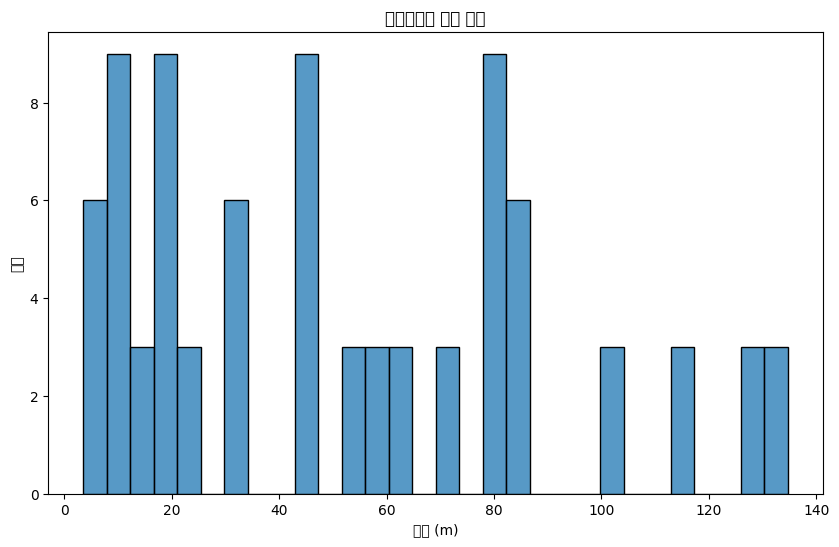


거리 통계 (미터 단위):
            count      mean        std       min        25%        50%  \
store_rank                                                               
1            28.0  52.59587  38.681643  3.549766  19.639882  46.462956   
2            28.0  52.59587  38.681643  3.549766  19.639882  46.462956   
3            28.0  52.59587  38.681643  3.549766  19.639882  46.462956   

                  75%         max  
store_rank                         
1           80.834836  134.725753  
2           80.834836  134.725753  
3           80.834836  134.725753  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Circle

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # Mac
# plt.rcParams['font.family'] = 'NanumGothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 표시

# 데이터 로드
df = pd.read_csv('../data/output/collected_samples.csv')

# 1. 기본 통계 확인
print("수집된 데이터 기본 정보:")
print(f"총 데이터 수: {len(df)}")
print(f"그룹 수: {df['group_id'].nunique()}")

# 2. 위치 데이터 시각화
plt.figure(figsize=(15, 15))

# 전체 공실 위치 표시 (회색)
plt.scatter(df['store_lon'], df['store_lat'], 
           c='lightgray', alpha=0.3, s=50,
           label='전체 공실')

# 참조 포인트와 선택된 공실 시각화
for group in df['group_id'].unique():
    group_data = df[df['group_id'] == group]
    ref_point = group_data.iloc[0]
    
    # 500m 반경 원 그리기 (약 0.0045도)
    circle = Circle((ref_point['reference_lon'], ref_point['reference_lat']), 
                   0.0045, fill=False, alpha=0.3, color='red')
    plt.gca().add_patch(circle)
    
    # 참조 포인트 표시
    plt.scatter(ref_point['reference_lon'], ref_point['reference_lat'], 
               c='red', s=100, alpha=0.6)
    
    # 선택된 공실들 표시
    plt.scatter(group_data['store_lon'], group_data['store_lat'], 
               c='blue', s=100, alpha=0.6)
    
    # 참조 포인트와 공실 연결
    for _, store in group_data.iterrows():
        plt.plot([ref_point['reference_lon'], store['store_lon']], 
                [ref_point['reference_lat'], store['store_lat']], 
                'gray', alpha=0.3, linestyle='--')

plt.title('공실 위치 및 선택 범위 시각화')
plt.xlabel('경도')
plt.ylabel('위도')
plt.grid(True, alpha=0.3)

# 범례 추가
plt.scatter([], [], c='red', s=100, label='참조 포인트')
plt.scatter([], [], c='blue', s=100, label='선택된 공실')
plt.plot([], [], 'gray', linestyle='--', label='연결선')
circle = plt.Circle((0, 0), 1, fill=False, color='red', label='500m 반경')
plt.gca().add_artist(circle)
plt.legend()

plt.show()

# 3. 거리 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='store_rank', y='distance')
plt.title('순위별 거리 분포')
plt.xlabel('공실 순위')
plt.ylabel('거리 (m)')
plt.show()

# 4. 거리 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='distance', bins=30)
plt.title('공실까지의 거리 분포')
plt.xlabel('거리 (m)')
plt.ylabel('빈도')
plt.show()

# 5. 기본 통계량
print("\n거리 통계 (미터 단위):")
print(df.groupby('store_rank')['distance'].describe())